H_MLP 0.9996814113441719
standard_MLP 0.8838948375465081
H_transformer 0.966392424665149
standard_transformer 0.5610630492014945


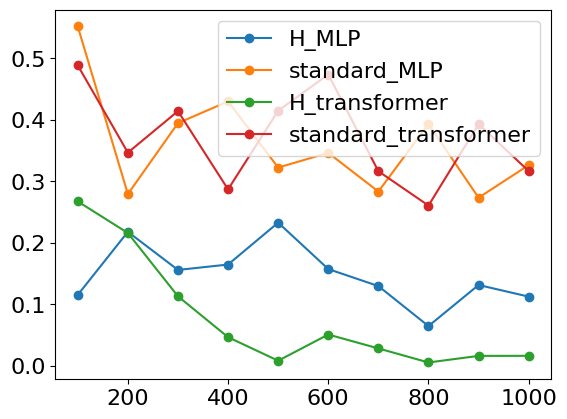

In [175]:
data_id = "equivalence"
data_id_choices = ["lattice", "greater", "family_tree", "equivalence", "circle"]
model_id_choices = ["H_MLP", "standard_MLP", "H_transformer", "standard_transformer"]

import json
import matplotlib.pyplot as plt

seed = 66
#data_id = "lattice"
data_size = 1000
train_ratio = 0.8

data_size_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for model_id in model_id_choices:
    metric_list = []
    for data_size in data_size_list:
        fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}.json'
        with open(fname, 'r') as file:
            data = json.load(file)
            metric_list.append(data['metric'])
            if data_size == 1000:
                print(model_id, data['variances'][0] + data['variances'][1])
        fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}_train_results.json'
        with open(fname, 'r') as file:
            data = json.load(file)
#            metric_list.append(data['test_accuracies'][-1])
    plt.plot(data_size_list, metric_list, '-o', label=model_id)

plt.legend()

Text(0.5, 1.0, 'Equivalence Classes')

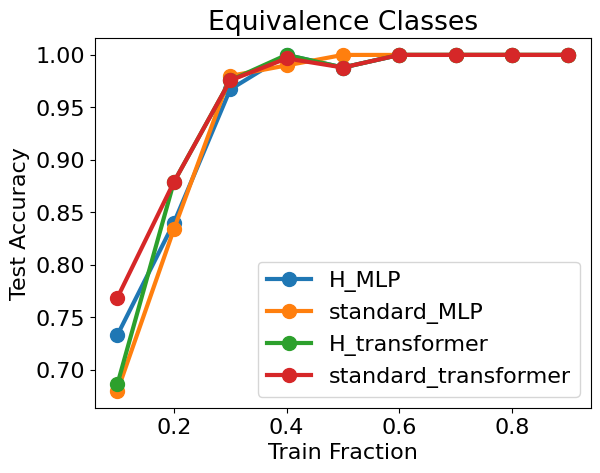

In [176]:
import numpy as np
plt.rcParams.update({'font.size': 16})
train_ratio_list = np.arange(1, 10) / 10
data_size = 1000

for model_id in model_id_choices:
    metric_list = []
    for train_ratio in train_ratio_list:
        fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}.json'
        with open(fname, 'r') as file:
            data = json.load(file)
#            metric_list.append(data['metric'])
        fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}_train_results.json'
        with open(fname, 'r') as file:
            data = json.load(file)
            metric_list.append(data['test_accuracies'][-1])
    plt.plot(train_ratio_list, metric_list, '-o', label=model_id,linewidth=3,markersize=10)

plt.legend()
plt.xlabel('Train Fraction')
plt.ylabel('Test Accuracy')

data_id_to_title = {
    "lattice": "In-context Learning",
    "greater": "Greater",
    "family_tree": "Genealogy Learning",
    "equivalence": "Equivalence Classes",
    "circle": "Modular Addition",
}
plt.title(data_id_to_title[data_id])

Text(0.5, 1.0, 'Genealogy Learning')

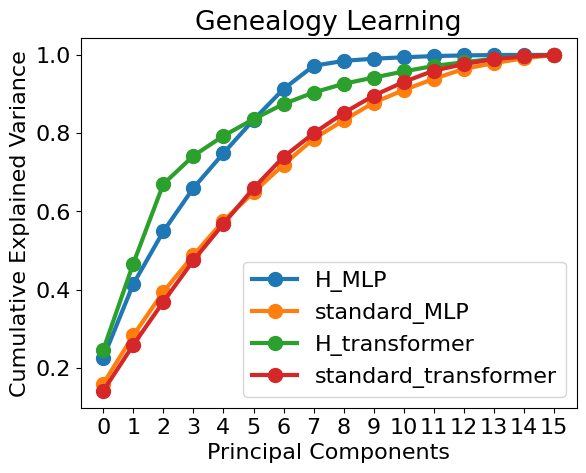

In [164]:
plt.rcParams.update({'font.size': 16})
train_ratio = 0.8
data_size = 1000
for model_id in model_id_choices:
    fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}.json'
    with open(fname, 'r') as file:
        data = json.load(file)
        metric_list = data['variances']
    plt.plot(range(16), np.cumsum(np.array(metric_list))[:16], '-o', label=model_id,linewidth=3,markersize=10)

plt.legend()
plt.xticks(range(16))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')

data_id_to_title = {
    "lattice": "In-context Learning",
    "greater": "Greater",
    "family_tree": "Genealogy Learning",
    "equivalence": "Equivalence Classes",
    "circle": "Modular Addition",
}
plt.title(data_id_to_title[data_id])


In [41]:
import torch
import matplotlib.pyplot as plt

seed = 66
plt.figure(figsize=(10, 6))
for model_id in ["H_MLP", "standard_MLP"]:

    data_size = 1000
    train_ratio = 0.8

    # Load the .pt file
    weights = torch.load(f"../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}.pt")

    # Check the structure of the file (if necessary)
    print(type(weights))
    if isinstance(weights, dict):
        print(weights.keys())  # See the keys in the dictionary

    # Collect all weights into a list
    all_weights = []

    for key, value in weights.items():
        if 'dist' not in key and isinstance(value, torch.Tensor):  # Ensure it's a tensor
            all_weights.extend(value.flatten().tolist())

    # Plot histogram
    
    plt.hist(all_weights, range=(-3,3),bins=100, edgecolor='k', alpha=0.7, label=model_id)
plt.title("Histogram of All Layer Weights")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()


/tmp/ipykernel_3615505/3721910725.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f"../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio

FileNotFoundError: [Errno 2] No such file or directory: '../results/77_lattice_H_MLP_1000_0.8.pt'

<Figure size 1000x600 with 0 Axes>

0.98 0.955
0.96875 0.95
0.985 0.985
0.96625 0.96
torch.Size([4, 7000]) torch.Size([4, 7000])


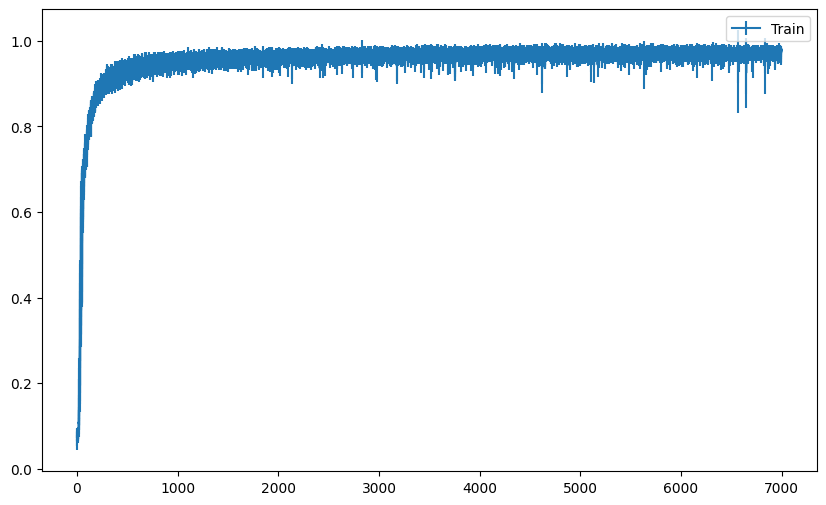

In [109]:
seed_list = np.linspace(0, 1000, 20, dtype=int)[:4]
model_id = "standard_transformer"
train_acc_list = []
test_acc_list = []
for seed in seed_list:
    fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}_train_results.json'
    with open(fname, 'r') as file:
        data = json.load(file)
        train_acc_list.append(data['train_accuracies'])
        test_acc_list.append(data['test_accuracies'])
        print(train_acc_list[-1][-1], test_acc_list[-1][-1])

train_acc_list = torch.tensor(train_acc_list)
test_acc_list = torch.tensor(test_acc_list)

print(train_acc_list.shape, test_acc_list.shape)

plt.figure(figsize=(10, 6))
plt.errorbar(range(train_acc_list.shape[1]), torch.mean(train_acc_list, dim=0), torch.std(train_acc_list, dim=0), label='Train')
#plt.errorbar(range(test_acc_list.shape[1]), torch.mean(test_acc_list, dim=0), torch.std(test_acc_list, dim=0), label='Test')
#plt.xlim(0,20)
plt.legend()

torch.Size([20, 7000]) torch.Size([20, 7000])


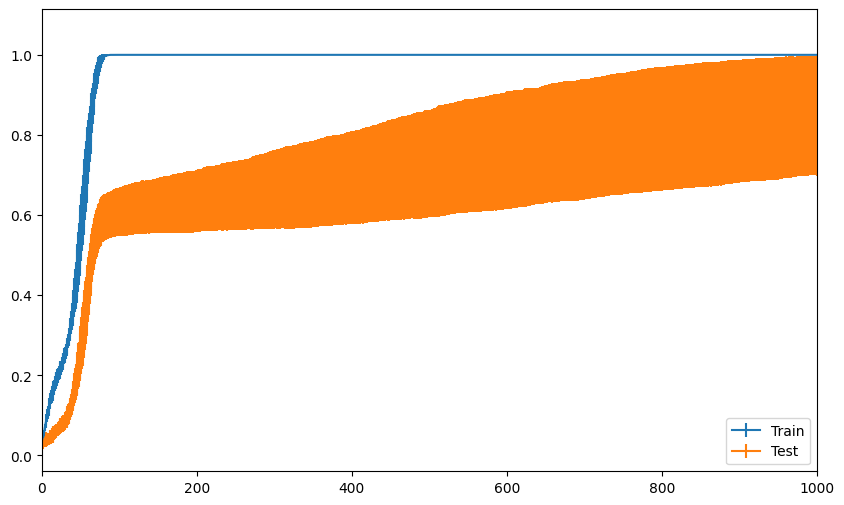

In [129]:
seed_list = np.linspace(0, 1000, 20, dtype=int)
model_id = "standard_MLP"
train_acc_list = []
test_acc_list = []
for seed in seed_list:
    fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}_train_results.json'
    with open(fname, 'r') as file:
        data = json.load(file)
        train_acc_list.append(data['train_accuracies'])
        test_acc_list.append(data['test_accuracies'])

train_acc_list = torch.tensor(train_acc_list)
test_acc_list = torch.tensor(test_acc_list)

print(train_acc_list.shape, test_acc_list.shape)

plt.figure(figsize=(10, 6))
plt.errorbar(range(train_acc_list.shape[1]), torch.mean(train_acc_list, dim=0), torch.std(train_acc_list, dim=0), label='Train')
plt.errorbar(range(test_acc_list.shape[1]), torch.mean(test_acc_list, dim=0), torch.std(test_acc_list, dim=0), label='Test')
plt.xlim(0,1000)
plt.legend()

Text(0.5, 1.0, 'Equivalence Classes')

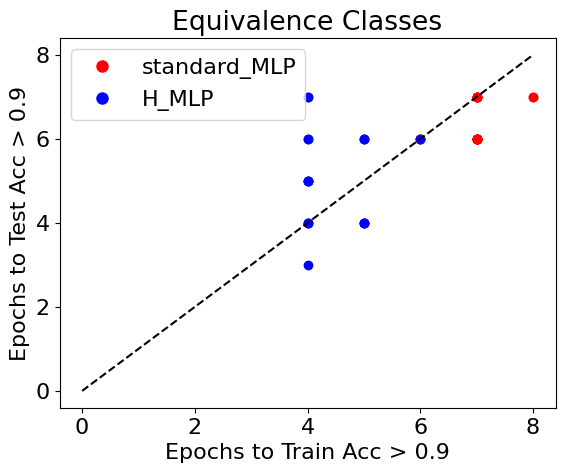

In [239]:
seed_list = np.linspace(0, 1000, 20, dtype=int)
data_id = "equivalence"
thres = 0.9
train_ratio = 0.8
train_acc_list = []
test_acc_list = []

max_idx = 0
model_id = "standard_MLP"
model_1 = model_id
for seed in seed_list:
    fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}_train_results.json'
    with open(fname, 'r') as file:
        data = json.load(file)
        train_acc_list.append(data['train_accuracies'])
        test_acc_list.append(data['test_accuracies'])
        idx_train = np.argmax(np.array(data['train_accuracies']) > thres)
        idx_test = np.argmax(np.array(data['test_accuracies']) > thres)
        if idx_train > max_idx:
            max_idx = idx_train
        if idx_test > max_idx:
            max_idx = idx_test
        plt.scatter([idx_train], [idx_test], c='r')


train_acc_list = []
test_acc_list = []
model_id = "H_MLP"
model_2 = model_id
for seed in seed_list:
    fname = f'../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}_train_results.json'
    with open(fname, 'r') as file:
        data = json.load(file)
        train_acc_list.append(data['train_accuracies'])
        test_acc_list.append(data['test_accuracies'])
        idx_train = np.argmax(np.array(data['train_accuracies']) > thres)
        idx_test = np.argmax(np.array(data['test_accuracies']) > thres)
        plt.scatter(idx_train, idx_test, c='b')
        if idx_train > max_idx:
            max_idx = idx_train
        if idx_test > max_idx:
            max_idx = idx_test

plt.plot(range(max_idx+1), range(max_idx+1), 'k--')
plt.xlabel('Epochs to Train Acc > {}'.format(thres))
plt.ylabel('Epochs to Test Acc > {}'.format(thres))

from matplotlib.lines import Line2D
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label=model_1, markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label=model_2, markerfacecolor='blue', markersize=10)
]
plt.legend(handles=legend_handles)
data_id_to_title = {
    "lattice": "In-context Learning",
    "greater": "Greater",
    "family_tree": "Genealogy Learning",
    "equivalence": "Equivalence Classes",
    "circle": "Modular Addition",
}
plt.title(data_id_to_title[data_id])


In [182]:
print(data_id)

equivalence
